In [14]:
!pip install torch torchvision torchaudio matplotlib numpy tqdm

In [1]:
import torch
import torchvision

from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torchvision.transforms import v2

import os
import json
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
for path_dir, dir_list, file_list in os.walk('./mnist/training'): # os.walk is GENERATOR func
            print(f'[os => walk]: {path_dir} | {len(dir_list)} | {len(file_list)}')

[os => walk]: ./mnist/training | 10 | 0
[os => walk]: ./mnist/training/class_4 | 0 | 5842
[os => walk]: ./mnist/training/class_3 | 0 | 6131
[os => walk]: ./mnist/training/class_2 | 0 | 5958
[os => walk]: ./mnist/training/class_5 | 0 | 5421
[os => walk]: ./mnist/training/class_9 | 0 | 5949
[os => walk]: ./mnist/training/class_0 | 0 | 5923
[os => walk]: ./mnist/training/class_7 | 0 | 6265
[os => walk]: ./mnist/training/class_6 | 0 | 5918
[os => walk]: ./mnist/training/class_1 | 0 | 6742
[os => walk]: ./mnist/training/class_8 | 0 | 5851


In [3]:
os.listdir('./dataset')

['img_73979.jpeg',
 'img_3530.jpeg',
 'img_47525.jpeg',
 'img_11345.jpeg',
 'img_38028.jpeg',
 'img_45518.jpeg',
 'img_13378.jpeg',
 'img_16480.jpeg',
 'img_71944.jpeg',
 'img_90402.jpeg',
 'img_26036.jpeg',
 'img_70656.jpeg',
 'img_77193.jpeg',
 'img_18867.jpeg',
 'img_53136.jpeg',
 'img_98032.jpeg',
 'img_78266.jpeg',
 'img_30418.jpeg',
 'img_66278.jpeg',
 'img_63580.jpeg',
 'img_32425.jpeg',
 'img_64245.jpeg',
 'img_84011.jpeg',
 'img_19775.jpeg',
 'img_66782.jpeg',
 'img_81213.jpeg',
 'img_37627.jpeg',
 'img_61047.jpeg',
 'img_29639.jpeg',
 'img_54309.jpeg',
 'img_36935.jpeg',
 'img_34908.jpeg',
 'img_56334.jpeg',
 'img_67890.jpeg',
 'img_41808.jpeg',
 'img_12990.jpeg',
 'img_23234.jpeg',
 'img_75454.jpeg',
 'img_95600.jpeg',
 'img_21209.jpeg',
 'img_77469.jpeg',
 'img_72391.jpeg',
 'img_7820.jpeg',
 'img_43835.jpeg',
 'img_88931.jpeg',
 'img_89623.jpeg',
 'img_42727.jpeg',
 'img_6732.jpeg',
 'img_14147.jpeg',
 'img_69477.jpeg',
 'img_94912.jpeg',
 'img_13682.jpeg',
 'img_70206.jpe

In [4]:
class DatasetReg (Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')
        
        self.len_dataset = len(self.list_name_file)
        
        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)

    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)
        
        img = Image.open(path_img)
        coord = torch.tensor(self.dict_coords[name_file], dtype=torch.float32)
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img, coord

    def __len__(self):
        return self.len_dataset

In [5]:
transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=(0.5, ), std=(0.5, ))
])

dataset_without_transform = DatasetReg('./dataset') # only for vizual test
dataset = DatasetReg('./dataset', transform=transform)

In [6]:
len(dataset)

img, coord = dataset[2]

print(f'''
        img: 
            {type(img)}
            {img.shape}
            {img.dtype}
            min = {img.min()}, max = {img.max()}
         
        coord:
            {type(coord)}
            {coord.shape}
            {coord.dtype}
''')


        img: 
            <class 'torchvision.tv_tensors._image.Image'>
            torch.Size([1, 64, 64])
            torch.float32
            min = -1.0, max = 0.5843138694763184
         
        coord:
            <class 'torch.Tensor'>
            torch.Size([2])
            torch.float32



Coord: tensor([34., 27.])


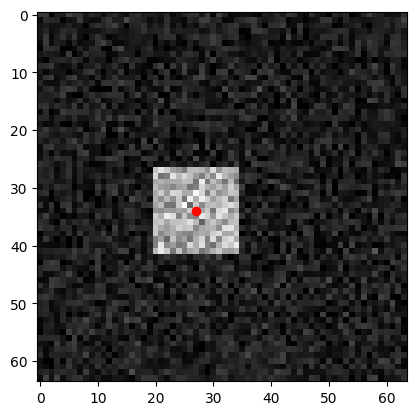

In [21]:
img, coord = dataset_without_transform[4020]
print(f'Coord: {coord}')

plt.scatter(coord[1], coord[0], c='#FF0800', marker='o')
plt.imshow(img, cmap='gray')
plt.show()

In [22]:
train_set, val_set, test_set = random_split(dataset, [0.7, 0.1, 0.2])

In [23]:
print(f'Train data set size: {len(train_set)}')
print(f'Val data set size: {len(val_set)}')
print(f'Test data set size: {len(test_set)}')

Train data set size: 70000
Val data set size: 10000
Test data set size: 20000


In [24]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [25]:
for i, (samples, target) in enumerate(train_loader):
    if i < 3:
        print(f'Batch number: {i + 1}')
        print(f'Samples shape: {samples.shape}')
        print(f'Target shape: {target.shape}')

print(f'\033[32m  .........................  \033[0m')

print(f'Batch number: {i + 1}')
print(f'Samples shape: {samples.shape}')
print(f'Target shape: {target.shape}')

Batch number: 1
Samples shape: torch.Size([64, 1, 64, 64])
Target shape: torch.Size([64, 2])
Batch number: 2
Samples shape: torch.Size([64, 1, 64, 64])
Target shape: torch.Size([64, 2])
Batch number: 3
Samples shape: torch.Size([64, 1, 64, 64])
Target shape: torch.Size([64, 2])
  .........................  
Batch number: 1094
Samples shape: torch.Size([48, 1, 64, 64])
Target shape: torch.Size([48, 2])
